In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
kof_df = pd.read_csv('Datasets/KOF_clean.csv')
kof_df.head()

,code,country,year,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFEcGIdj,KOFTrGI,...,KOFIpGIdj,KOFInGI,KOFInGIdf,KOFInGIdj,KOFCuGI,KOFCuGIdf,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj
0,BRA,Brazil,1990,42.0,44.0,40.0,28.0,24.0,31.0,26.0,...,32.0,39.0,32.0,46.0,40.0,29.0,51.0,65.0,85.0,46.0
1,BRA,Brazil,1991,44.0,43.0,44.0,27.0,23.0,31.0,27.0,...,32.0,39.0,31.0,46.0,38.0,30.0,46.0,71.0,84.0,58.0
2,BRA,Brazil,1992,45.0,45.0,45.0,29.0,27.0,32.0,28.0,...,33.0,40.0,31.0,50.0,38.0,29.0,47.0,72.0,84.0,60.0
3,BRA,Brazil,1993,46.0,46.0,46.0,30.0,29.0,32.0,29.0,...,32.0,41.0,30.0,52.0,40.0,32.0,47.0,73.0,84.0,62.0
4,BRA,Brazil,1994,48.0,45.0,50.0,29.0,25.0,33.0,29.0,...,33.0,41.0,30.0,52.0,39.0,34.0,44.0,81.0,86.0,75.0


In [3]:
dataset_list = ['BOVESPA-BRA-Clean', 'CAC40-FRA-Clean', 'DAX30-DEU-Clean', 'HangSeng-HKG-Clean', 
    'Nikkei225-JPN-Clean', 'Shanghai-CHN-Clean', 'Nifty50-IND-Clean', 'S&P500-USA-Clean',
    'NASI-KEN-Clean', 'MASI-MAR-Clean', 'FTSE_JSE-ZAF-Clean']

sp_df = pd.read_csv('Datasets/S&P500-USA-Clean.csv')
countries_df = pd.DataFrame(columns=['year', 'YoY Change', 'code'])
for df_name in dataset_list:
    df = pd.read_csv('./Datasets/' + df_name + '.csv')
    countries_df = pd.concat([countries_df, df])

kof_df = kof_df.merge(countries_df, on=['year', 'code'])

In [4]:
alt.Chart(kof_df).mark_point().encode(
    x='KOFGI',
    y='YoY Change:Q',
    color='code:N'
).interactive()

alt.Chart(...)

<Axes: >

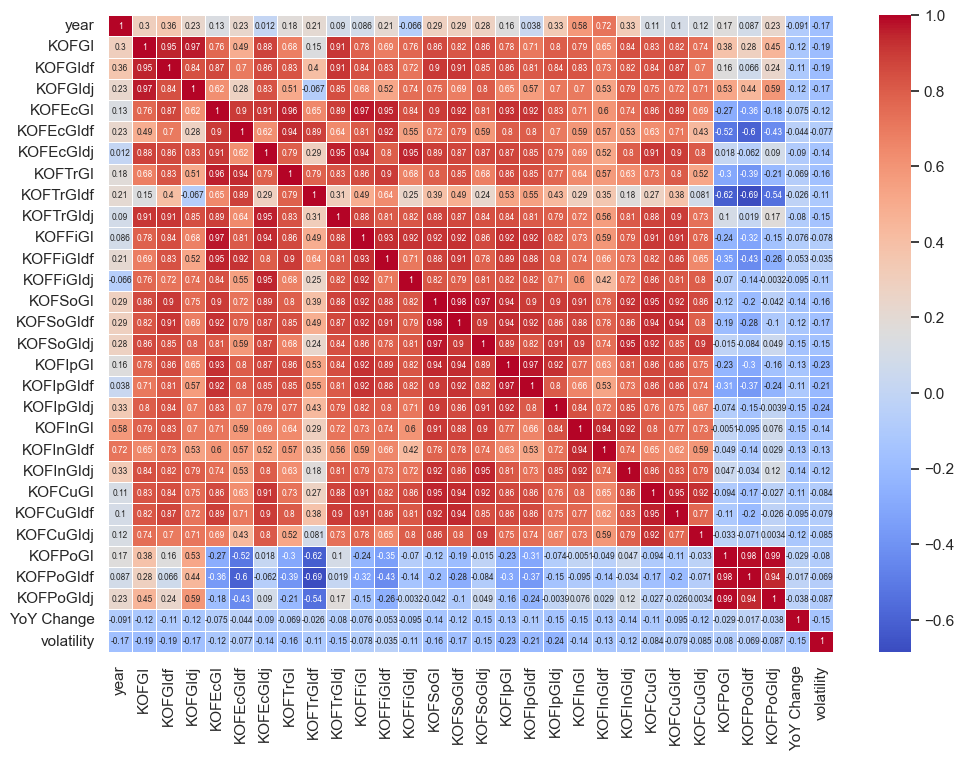

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = kof_df.drop(['country', 'code'], axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6})

In [6]:
kof_df.shape

(292, 32)

<Axes: >

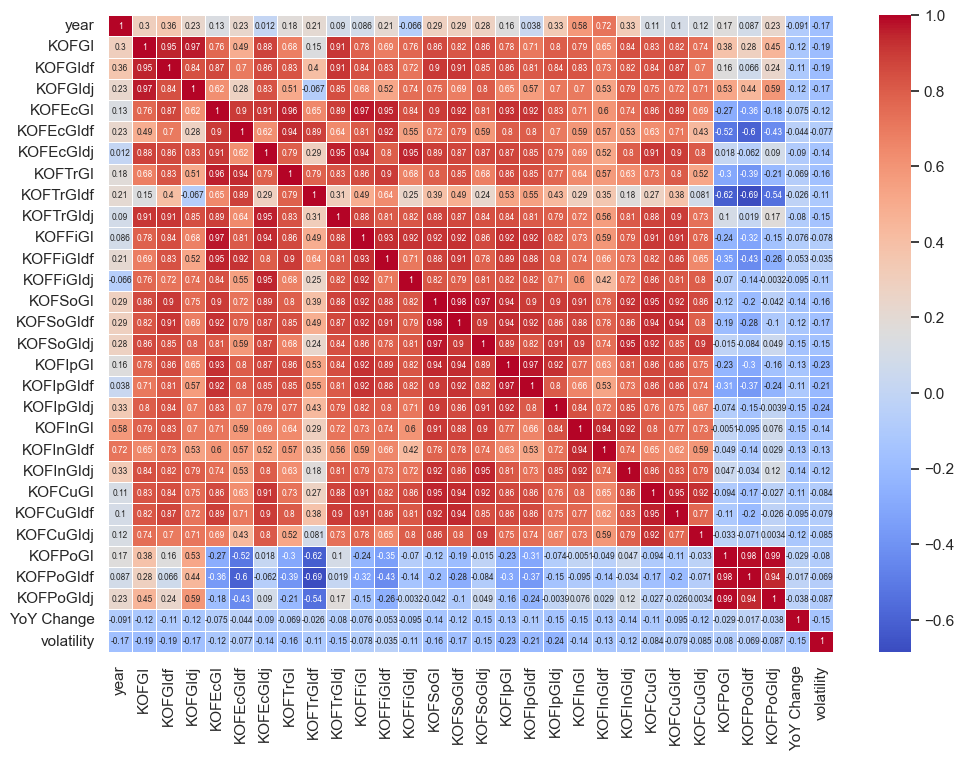

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = kof_df.drop(['country', 'code'], axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6})

In [8]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame and it's already been loaded

# Create the lagged Volatility variable
kof_df['volatility_lagged'] = kof_df.groupby('code')['volatility'].shift(1)

# Drop the rows with missing values after shifting
kof_df = kof_df.dropna(subset=['volatility_lagged'])
# Define the independent variables and add a constant term
X = kof_df[['volatility_lagged', 'KOFFiGI']]
X = sm.add_constant(X)

# Define the dependent variable
y = kof_df['volatility']

# Fit the regression model
model = sm.OLS(y, X).fit()
# Get the summary of the regression model
model_summary = model.summary()

# Print the regression model summary
print(model_summary)

# Perform hypothesis testing
# Test if the coefficients of Volatility_lagged and KOFFiGI are jointly significantly different from zero
hypotheses = '(volatility_lagged = 0), (KOFFiGI = 0)'
f_test_result = model.f_test(hypotheses)

# Print the F-test result
print(f'Test for Hypotheses: {hypotheses}')
print(f'F-test result: {f_test_result}')


                            OLS Regression Results                            
Dep. Variable:             volatility   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     35.17
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.54e-14
Time:                        22:01:25   Log-Likelihood:                -886.45
No. Observations:                 252   AIC:                             1779.
Df Residuals:                     249   BIC:                             1789.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.2828      2.40